# Stereographic maps
This notebook showcases an accessor class for stereographic map plots produced with {mod}`cartopy` and {mod}`matplotlib`.

<!-- 
<div class='alert alert-success'>
This notebook showcases an accessor class for stereographic map plots produced with `cartopy` and `matplotlib`.
</div> -->

An accessor can be registered with the {deco}`~my_code_base.plot.maps.register_geoaxes_accessor` decorator in {mod}`my_code_base.plot.maps`. The accessor can be given an arbitrary name and should inherit from the {class}`my_code_base.plot.maps.GeoAxesAccessor` ABC meta class, which provides some basic geographic-map related methods. 

For example, the "polar" accessor is registered as follows:

```python
@register_geoaxes_accessor("polar")
class StereographicAxisAccessor(GeoAxesAccessor):
    """An accessor to handle features and finishing of stereographic plots produced with `cartopy`.
    Can handle both {class}`ccrs.NorthPolarStereo` and {class}`ccrs.SouthPolarStereo` projections."""
    def __init__(self, ax):
        super().__init__(ax)

        ...
```

This notebook shall demonstrate the usage of such an accessor.

```{tip}
This accessor works both for {class}`~cartopy.crs.NorthPolarStereo` and {class}`~cartopy.crs.SouthPolarStereo` projections.
```

First, let's load some packages. The {obj}`polar <my_code_base.plot.maps.StereographicAxisAccessor>` accessor is part of {mod}`my_code_base.plot.maps`.

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import my_code_base.plot.maps

Features can be added, for example, with the method {meth}`~my_code_base.plot.maps.StereographicAxisAccessor.add_features`, which adds the most common features to the axis, including a ruler around the domain and rotated longitude labels.

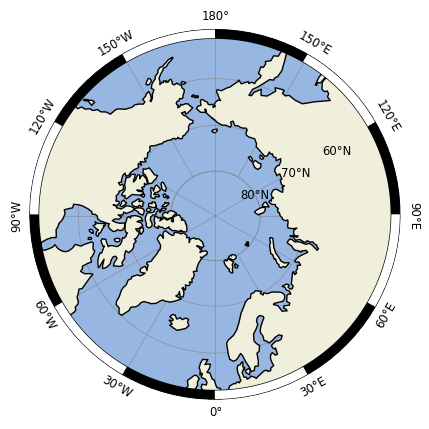

In [6]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
ax.polar.add_features(ruler_kwargs={'segment_length':30})

In [11]:
from myst_nb import glue
glue("polar_plot_features", fig, display=False)

Alternatively, the different features can be added individually:

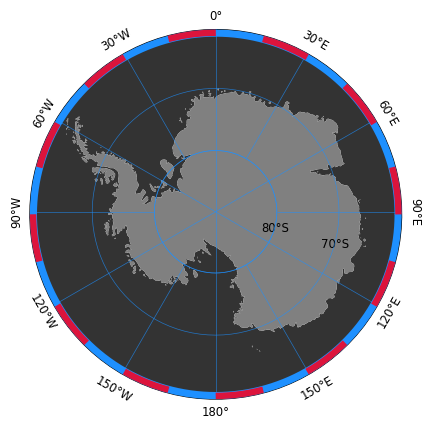

In [5]:
ax = plt.subplot(projection=ccrs.SouthPolarStereo())

ax.polar.set_extent([-180,180,-90,-60])
ax.polar.add_ocean(fc='.2')
ax.polar.add_land(fc='.5')
ax.polar.make_circular()
ax.polar.add_gridlines(zorder=100, color='dodgerblue')
ax.polar.rotate_lon_labels()
ax.polar.rotate_lat_labels(target_lon=105)
ax.polar.add_ruler(segment_length=15, primary_color='dodgerblue', secondary_color='crimson')

```{seealso}
More details about the individual arguments for each method can be found in the source code of {class}`my_code_base.plot.maps.StereographicAxisAccessor`.
```